# Predicting house price with keras

A competition project from Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

Let's get started!

Uncomment and run the cell below to install the Libararies we are going to use in this notebook. Skip if you have them already.

In [ ]:
#!pip3 install tensorflow==1.15
#!pip3 install keras
#!pip3 install -U scikit-learn

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
from sklearn import preprocessing, model_selection

from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras import optimizers, regularizers, initializers, Model
import keras.backend as K

import tensorflow as tf
print(tf.__version__)

%matplotlib inline

Using TensorFlow backend.


1.15.0


Load the training dataset and see what are the features does it have

In [162]:
train = pd.read_csv('train.csv')

In [163]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Remove the first column (house Ids)

In [164]:
train.drop('Id', axis=1, inplace=True)
print('train set size: ', train.shape)
train.head()

train set size:  (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let see what percentage of data are missing in each column and drop the ones that have too many missing values

In [165]:
not_nulls = {}
for colname in train.columns :
    not_nulls[colname] = train[colname].notnull().sum()/train.shape[0]
    
print(not_nulls)

{'MSSubClass': 1.0, 'MSZoning': 1.0, 'LotFrontage': 0.8226027397260274, 'LotArea': 1.0, 'Street': 1.0, 'Alley': 0.06232876712328767, 'LotShape': 1.0, 'LandContour': 1.0, 'Utilities': 1.0, 'LotConfig': 1.0, 'LandSlope': 1.0, 'Neighborhood': 1.0, 'Condition1': 1.0, 'Condition2': 1.0, 'BldgType': 1.0, 'HouseStyle': 1.0, 'OverallQual': 1.0, 'OverallCond': 1.0, 'YearBuilt': 1.0, 'YearRemodAdd': 1.0, 'RoofStyle': 1.0, 'RoofMatl': 1.0, 'Exterior1st': 1.0, 'Exterior2nd': 1.0, 'MasVnrType': 0.9945205479452055, 'MasVnrArea': 0.9945205479452055, 'ExterQual': 1.0, 'ExterCond': 1.0, 'Foundation': 1.0, 'BsmtQual': 0.9746575342465753, 'BsmtCond': 0.9746575342465753, 'BsmtExposure': 0.9739726027397261, 'BsmtFinType1': 0.9746575342465753, 'BsmtFinSF1': 1.0, 'BsmtFinType2': 0.9739726027397261, 'BsmtFinSF2': 1.0, 'BsmtUnfSF': 1.0, 'TotalBsmtSF': 1.0, 'Heating': 1.0, 'HeatingQC': 1.0, 'CentralAir': 1.0, 'Electrical': 0.9993150684931507, '1stFlrSF': 1.0, '2ndFlrSF': 1.0, 'LowQualFinSF': 1.0, 'GrLivArea': 1

In [166]:
cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
train = train.drop(cols, axis=1)
print('train set size after removing nan columns: ', train.shape)

train set size after removing nan columns:  (1460, 75)


Let's see how some of features are correlated with the sale price

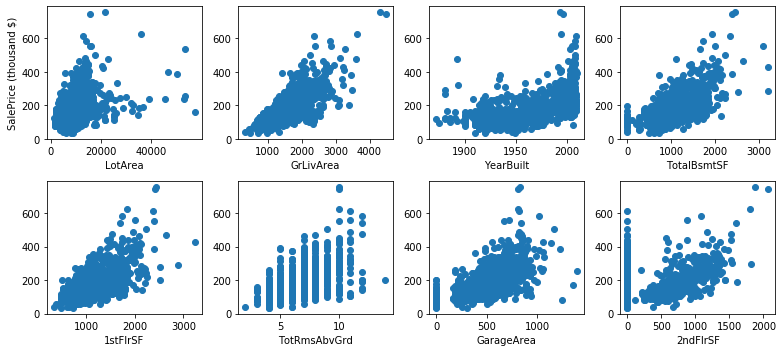

In [176]:
fig = plt.figure(figsize=(11, 5))

ax = fig.add_subplot(2,4,1)
ax.scatter(train.LotArea, train.SalePrice/1e3)
ax.set_xlabel('LotArea')
ax.set_ylabel('SalePrice (thousand $)')

ax = fig.add_subplot(2,4,2)
ax.scatter(train.GrLivArea, train.SalePrice/1e3)
ax.set_xlabel('GrLivArea')

ax = fig.add_subplot(2,4,3)
ax.scatter(train.YearBuilt, train.SalePrice/1e3)
ax.set_xlabel('YearBuilt')

ax = fig.add_subplot(2,4,4)
ax.scatter(train.TotalBsmtSF, train.SalePrice/1e3)
ax.set_xlabel('TotalBsmtSF')

ax = fig.add_subplot(2,4,5)
ax.scatter(train['1stFlrSF'], train.SalePrice/1e3)
ax.set_xlabel('1stFlrSF')

ax = fig.add_subplot(2,4,6)
ax.scatter(train.TotRmsAbvGrd, train.SalePrice/1e3)
ax.set_xlabel('TotRmsAbvGrd')

ax = fig.add_subplot(2,4,7)
ax.scatter(train.GarageArea, train.SalePrice/1e3)
ax.set_xlabel('GarageArea')

ax = fig.add_subplot(2,4,8)
ax.scatter(train['2ndFlrSF'], train.SalePrice/1e3)
ax.set_xlabel('2ndFlrSF')

fig.tight_layout();

In [172]:
train = train.drop(train[(train['LotArea']>60000) & (train['SalePrice']<400000)].index)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['TotalBsmtSF']>4000)].index)
train = train.drop(train[(train['1stFlrSF']>4000)].index)

Some features are numeric and the others are categorical. Let identify the type of each feature and replace missing values in the numeric columns with its average. We can also replace missing categorical values with a random caegory. Obviously, this is something to tune to obtain the most optimal performance.

In [173]:
print('External condition: ', train.ExterCond.unique())
print('Sale condition: ', train.SaleCondition.unique())

External condition:  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Sale condition:  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


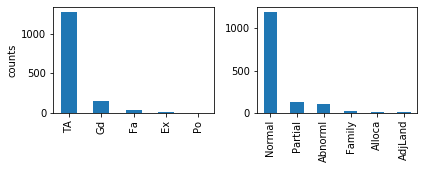

In [174]:
fig = plt.figure(figsize=(6,2.5))

ax = fig.add_subplot(1,2,1)
train.ExterCond.value_counts().plot(kind='bar')
ax.set_ylabel('counts')

ax = fig.add_subplot(1,2,2)
train.SaleCondition.value_counts().plot(kind='bar');

fig.tight_layout()

In [177]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

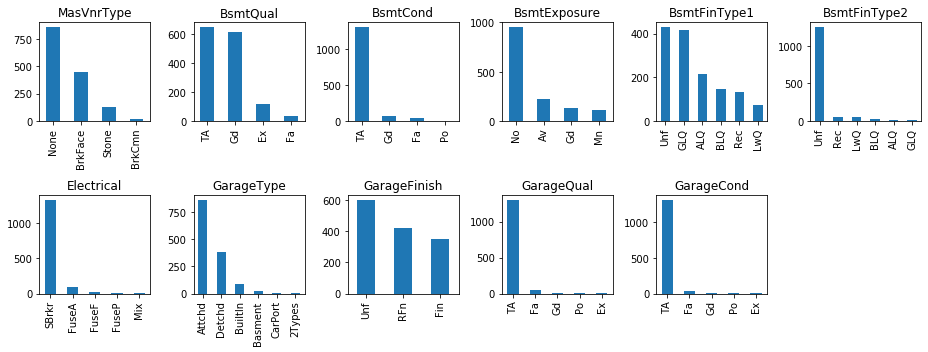

In [178]:
fig = plt.figure(figsize=(13,5))

ax = fig.add_subplot(2,6,1)
train.MasVnrType.value_counts().plot(kind='bar')
ax.set_title('MasVnrType')

ax = fig.add_subplot(2,6,2)
train.BsmtQual.value_counts().plot(kind='bar');
ax.set_title('BsmtQual')

ax = fig.add_subplot(2,6,3)
train.BsmtCond.value_counts().plot(kind='bar');
ax.set_title('BsmtCond')

ax = fig.add_subplot(2,6,4)
train.BsmtExposure.value_counts().plot(kind='bar');
ax.set_title('BsmtExposure')

ax = fig.add_subplot(2,6,5)
train.BsmtFinType1.value_counts().plot(kind='bar');
ax.set_title('BsmtFinType1')

ax = fig.add_subplot(2,6,6)
train.BsmtFinType2.value_counts().plot(kind='bar');
ax.set_title('BsmtFinType2')

ax = fig.add_subplot(2,6,7)
train.Electrical.value_counts().plot(kind='bar');
ax.set_title('Electrical')

ax = fig.add_subplot(2,6,8)
train.GarageType.value_counts().plot(kind='bar');
ax.set_title('GarageType')

ax = fig.add_subplot(2,6,9)
train.GarageFinish.value_counts().plot(kind='bar');
ax.set_title('GarageFinish')

ax = fig.add_subplot(2,6,10)
train.GarageQual.value_counts().plot(kind='bar');
ax.set_title('GarageQual')

ax = fig.add_subplot(2,6,11)
train.GarageCond.value_counts().plot(kind='bar');
ax.set_title('GarageCond')

fig.tight_layout()

In [179]:
train['MasVnrType'] = train['MasVnrType'].fillna('None');
train['BsmtQual'] = train['BsmtQual'].fillna('TA');
train['BsmtCond'] = train['BsmtCond'].fillna('TA');
train['BsmtExposure'] = train['BsmtExposure'].fillna('No')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('Unf')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('Unf')
train['Electrical'] = train['Electrical'].fillna('SBrkr')
train['GarageType'] = train['GarageType'].fillna('Attchd')
train['GarageFinish'] = train['GarageFinish'].fillna('RFn')
train['GarageQual']= train['GarageQual'].fillna('TA')
train['GarageCond'] = train['GarageCond'].fillna('TA')

In [180]:
not_nulls = {}
for colname in train.columns :
    not_nulls[colname] = train[colname].notnull().sum()/train.shape[0]
    
print(not_nulls)

{'MSSubClass': 1.0, 'MSZoning': 1.0, 'LotFrontage': 1.0, 'LotArea': 1.0, 'Street': 1.0, 'LotShape': 1.0, 'LandContour': 1.0, 'Utilities': 1.0, 'LotConfig': 1.0, 'LandSlope': 1.0, 'Neighborhood': 1.0, 'Condition1': 1.0, 'Condition2': 1.0, 'BldgType': 1.0, 'HouseStyle': 1.0, 'OverallQual': 1.0, 'OverallCond': 1.0, 'YearBuilt': 1.0, 'YearRemodAdd': 1.0, 'RoofStyle': 1.0, 'RoofMatl': 1.0, 'Exterior1st': 1.0, 'Exterior2nd': 1.0, 'MasVnrType': 1.0, 'MasVnrArea': 1.0, 'ExterQual': 1.0, 'ExterCond': 1.0, 'Foundation': 1.0, 'BsmtQual': 1.0, 'BsmtCond': 1.0, 'BsmtExposure': 1.0, 'BsmtFinType1': 1.0, 'BsmtFinSF1': 1.0, 'BsmtFinType2': 1.0, 'BsmtFinSF2': 1.0, 'BsmtUnfSF': 1.0, 'TotalBsmtSF': 1.0, 'Heating': 1.0, 'HeatingQC': 1.0, 'CentralAir': 1.0, 'Electrical': 1.0, '1stFlrSF': 1.0, '2ndFlrSF': 1.0, 'LowQualFinSF': 1.0, 'GrLivArea': 1.0, 'BsmtFullBath': 1.0, 'BsmtHalfBath': 1.0, 'FullBath': 1.0, 'HalfBath': 1.0, 'BedroomAbvGr': 1.0, 'KitchenAbvGr': 1.0, 'KitchenQual': 1.0, 'TotRmsAbvGrd': 1.0, 'F

Now we are going to replace categorical features with numeric values. 'LabelEncoder' can be used to normalize labels.

In [181]:
dt = {}
for col in train.columns : 
    dt[col] = train[col].dtype

print(dt)
train.head()

{'MSSubClass': dtype('int64'), 'MSZoning': dtype('O'), 'LotFrontage': dtype('float64'), 'LotArea': dtype('int64'), 'Street': dtype('O'), 'LotShape': dtype('O'), 'LandContour': dtype('O'), 'Utilities': dtype('O'), 'LotConfig': dtype('O'), 'LandSlope': dtype('O'), 'Neighborhood': dtype('O'), 'Condition1': dtype('O'), 'Condition2': dtype('O'), 'BldgType': dtype('O'), 'HouseStyle': dtype('O'), 'OverallQual': dtype('int64'), 'OverallCond': dtype('int64'), 'YearBuilt': dtype('int64'), 'YearRemodAdd': dtype('int64'), 'RoofStyle': dtype('O'), 'RoofMatl': dtype('O'), 'Exterior1st': dtype('O'), 'Exterior2nd': dtype('O'), 'MasVnrType': dtype('O'), 'MasVnrArea': dtype('float64'), 'ExterQual': dtype('O'), 'ExterCond': dtype('O'), 'Foundation': dtype('O'), 'BsmtQual': dtype('O'), 'BsmtCond': dtype('O'), 'BsmtExposure': dtype('O'), 'BsmtFinType1': dtype('O'), 'BsmtFinSF1': dtype('int64'), 'BsmtFinType2': dtype('O'), 'BsmtFinSF2': dtype('int64'), 'BsmtUnfSF': dtype('int64'), 'TotalBsmtSF': dtype('int6

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [182]:
le = preprocessing.LabelEncoder()
for col in train.columns :
    if train[col].dtype == object : 
        le.fit(train[col])
        train[col] = le.transform(train[col])
 

dt = {}
for col in train.columns : 
    dt[col] = train[col].dtype

print(dt)
train.head()

{'MSSubClass': dtype('int64'), 'MSZoning': dtype('int64'), 'LotFrontage': dtype('float64'), 'LotArea': dtype('int64'), 'Street': dtype('int64'), 'LotShape': dtype('int64'), 'LandContour': dtype('int64'), 'Utilities': dtype('int64'), 'LotConfig': dtype('int64'), 'LandSlope': dtype('int64'), 'Neighborhood': dtype('int64'), 'Condition1': dtype('int64'), 'Condition2': dtype('int64'), 'BldgType': dtype('int64'), 'HouseStyle': dtype('int64'), 'OverallQual': dtype('int64'), 'OverallCond': dtype('int64'), 'YearBuilt': dtype('int64'), 'YearRemodAdd': dtype('int64'), 'RoofStyle': dtype('int64'), 'RoofMatl': dtype('int64'), 'Exterior1st': dtype('int64'), 'Exterior2nd': dtype('int64'), 'MasVnrType': dtype('int64'), 'MasVnrArea': dtype('float64'), 'ExterQual': dtype('int64'), 'ExterCond': dtype('int64'), 'Foundation': dtype('int64'), 'BsmtQual': dtype('int64'), 'BsmtCond': dtype('int64'), 'BsmtExposure': dtype('int64'), 'BsmtFinType1': dtype('int64'), 'BsmtFinSF1': dtype('int64'), 'BsmtFinType2': d

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


Take the last column of the dataset and see how well-correlated it is with all the other features

In [183]:
SalePrice = train.SalePrice
train = train.drop('SalePrice', axis=1)

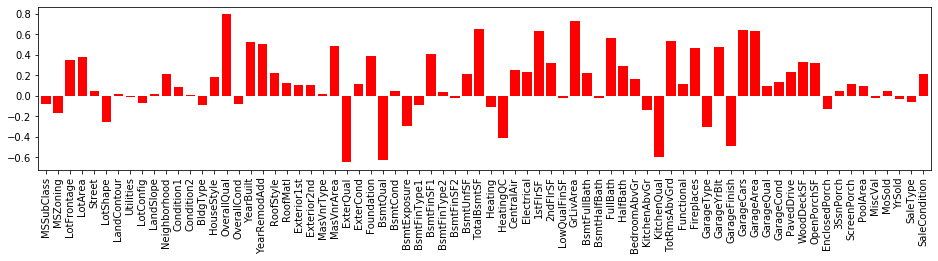

In [184]:
fig = plt.figure(figsize=(16,3))
train.corrwith(SalePrice).plot(kind='bar', color='r', width=0.8)

Now we are going to z-score features and the sale prices

In [185]:
for col in train.columns :
    train[col] = (train[col] - train[col].mean())/train[col].std()

In [189]:
SalePrice = np.array(SalePrice).reshape(SalePrice.shape[0], 1)
mu = SalePrice.mean()
sigma = SalePrice.std()
SalePrice = (SalePrice - mu)/sigma

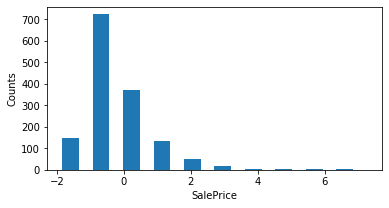

In [190]:
fig = plt.figure(figsize=(6,3))

plt.hist(SalePrice, width=0.5)
plt.xlabel('SalePrice')
plt.ylabel('Counts');

Save 20% of training set as cross-validation set to use it for tuning hyperparameters of the networks e.g. learning rate, number of epochs, number of hidden layers, ...

In [191]:
train = train.to_numpy()
train_x, xvalid_x, train_y, xvalid_y = model_selection.train_test_split(train, SalePrice, train_size=0.8, shuffle=True)
print(train_x.shape, train_y.shape, xvalid_x.shape, xvalid_y.shape)
print(type(train_x), type(train_y))

(1162, 74) (1162, 1) (291, 74) (291, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# STEPS TO MAKE A MODEL IN KERAS
### 1. Define the model

In [192]:
def price_model (input_shape) :
    x_input = Input(input_shape)

    x = Dense(128, activation='tanh', kernel_initializer='glorot_uniform')(x_input)
    x = BatchNormalization(epsilon=0.01, momentum=0.99)(x)
    
    x = Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization(epsilon=0.01, momentum=0.99)(x)
    
    x = Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization(epsilon=0.01, momentum=0.99)(x)
    
    x = Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization(epsilon=0.01, momentum=0.99)(x)
    
    x = Dense(16, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization(epsilon=0.01, momentum=0.99)(x)

    x_output = Dense(1, activation=None, use_bias=True, kernel_regularizer=regularizers.l2(0.01),
              bias_regularizer=regularizers.l2(0.02))(x)

    model = Model(inputs=x_input, outputs=x_output, name='price_model')
    
    return model

### 2. Create the model by calling the function above

In [193]:
priceModel = price_model(np.shape(train_x[1,:]))
print(priceModel.summary())

Model: "price_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 74)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               9600      
_________________________________________________________________
batch_normalization_19 (Batc (None, 128)               512       
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_21 (Batc (None, 64)                

### 3. Compile the model


In [194]:
optim = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.99)
priceModel.compile(optimizer=optim, loss='mean_squared_error', metrics=['accuracy'])

### 4. Train the network


In [210]:
priceModel.fit(x=train_x, y=train_y, batch_size=64, epochs=100, verbose=1, shuffle=True, validation_split=0.0)

Epoch 1/100
1162/1162 [==============================] - 0s 140us/step - loss: 0.0619 - accuracy: 0.0000e+00
Epoch 2/100
1162/1162 [==============================] - 0s 127us/step - loss: 0.0534 - accuracy: 0.0000e+00
Epoch 3/100
1162/1162 [==============================] - 0s 125us/step - loss: 0.0539 - accuracy: 0.0000e+00
Epoch 4/100
1162/1162 [==============================] - 0s 130us/step - loss: 0.0601 - accuracy: 0.0000e+00
Epoch 5/100
1162/1162 [==============================] - 0s 128us/step - loss: 0.0505 - accuracy: 0.0000e+00
Epoch 6/100
1162/1162 [==============================] - 0s 127us/step - loss: 0.0500 - accuracy: 0.0000e+00
Epoch 7/100
1162/1162 [==============================] - 0s 132us/step - loss: 0.0553 - accuracy: 0.0000e+00
Epoch 8/100
1162/1162 [==============================] - 0s 132us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 9/100
1162/1162 [==============================] - 0s 154us/step - loss: 0.0672 - accuracy: 0.0000e+00
Epoch 10/100
1162/1

1162/1162 [==============================] - 0s 139us/step - loss: 0.0708 - accuracy: 0.0000e+00
Epoch 76/100
1162/1162 [==============================] - 0s 137us/step - loss: 0.0563 - accuracy: 0.0000e+00
Epoch 77/100
1162/1162 [==============================] - 0s 145us/step - loss: 0.0540 - accuracy: 0.0000e+00
Epoch 78/100
1162/1162 [==============================] - 0s 140us/step - loss: 0.0424 - accuracy: 0.0000e+00
Epoch 79/100
1162/1162 [==============================] - 0s 165us/step - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 80/100
1162/1162 [==============================] - 0s 162us/step - loss: 0.0400 - accuracy: 0.0000e+00
Epoch 81/100
1162/1162 [==============================] - 0s 144us/step - loss: 0.0660 - accuracy: 0.0000e+00
Epoch 82/100
1162/1162 [==============================] - 0s 136us/step - loss: 0.0399 - accuracy: 0.0000e+00
Epoch 83/100
1162/1162 [==============================] - 0s 155us/step - loss: 0.0358 - accuracy: 0.0000e+00
Epoch 84/100
1162/1162 

### 5. Evaluate the network


In [211]:
pred = priceModel.evaluate(x=xvalid_x, y=xvalid_y, batch_size=64, verbose=1)
print('Loss: ' + str(pred[0]))
print('Accuracy: ' + str(pred[1]))

291/291 [==============================] - 0s 51us/step
Loss: 0.10411737746594288
Accuracy: 0.0


How acurate our predictions are for cross-validation set?

(-50.0, 1050.0, -50.0, 1050.0)

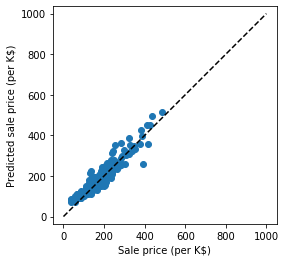

In [200]:
xvalid_pred = priceModel.predict(xvalid_x)

fig = plt.figure(figsize=(4,4))
plt.scatter((xvalid_y*sigma+mu)/1e3, (xvalid_pred*sigma+mu)/1e3)
plt.plot([0,1e3], [0,1e3], 'k--')
plt.xlabel('Sale price (per K$)')
plt.ylabel('Predicted sale price (per K$)');

Now we are going to clean and preprocess the test dataset just like what we did for the training dataset

In [201]:
test = pd.read_csv('test.csv')

test_ids = test.Id
test.drop('Id', axis=1, inplace=True)
print('test set size: ', test.shape)

not_nulls = {}
for colname in test.columns :
    not_nulls[colname] = test[colname].notnull().sum()/test.shape[0]
    
print(not_nulls)

test set size:  (1459, 79)
{'MSSubClass': 1.0, 'MSZoning': 0.9972583961617546, 'LotFrontage': 0.8444139821795751, 'LotArea': 1.0, 'Street': 1.0, 'Alley': 0.07333790267306374, 'LotShape': 1.0, 'LandContour': 1.0, 'Utilities': 0.9986291980808774, 'LotConfig': 1.0, 'LandSlope': 1.0, 'Neighborhood': 1.0, 'Condition1': 1.0, 'Condition2': 1.0, 'BldgType': 1.0, 'HouseStyle': 1.0, 'OverallQual': 1.0, 'OverallCond': 1.0, 'YearBuilt': 1.0, 'YearRemodAdd': 1.0, 'RoofStyle': 1.0, 'RoofMatl': 1.0, 'Exterior1st': 0.9993145990404386, 'Exterior2nd': 0.9993145990404386, 'MasVnrType': 0.9890335846470185, 'MasVnrArea': 0.9897189856065799, 'ExterQual': 1.0, 'ExterCond': 1.0, 'Foundation': 1.0, 'BsmtQual': 0.969842357779301, 'BsmtCond': 0.9691569568197396, 'BsmtExposure': 0.969842357779301, 'BsmtFinType1': 0.9712131596984236, 'BsmtFinSF1': 0.9993145990404386, 'BsmtFinType2': 0.9712131596984236, 'BsmtFinSF2': 0.9993145990404386, 'BsmtUnfSF': 0.9993145990404386, 'TotalBsmtSF': 0.9993145990404386, 'Heating': 

In [202]:
cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
test = test.drop(cols, axis=1)
print('test set size after removing nan columns: ', test.shape)

test set size after removing nan columns:  (1459, 74)


In [203]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

test['MasVnrType'] = test['MasVnrType'].fillna('None');
test['BsmtQual'] = test['BsmtQual'].fillna('TA');
test['BsmtCond'] = test['BsmtCond'].fillna('TA');
test['BsmtExposure'] = test['BsmtExposure'].fillna('Mn')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('ALQ')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('Unf')
test['Electrical'] = test['Electrical'].fillna('SBrkr')
test['GarageType'] = test['GarageType'].fillna('Attchd')
test['GarageFinish'] = test['GarageFinish'].fillna('RFn')
test['GarageQual']= test['GarageQual'].fillna('TA')
test['GarageCond'] = test['GarageCond'].fillna('TA')

In [204]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())


not_nulls = {}
for colname in test.columns :
    not_nulls[colname] = test[colname].notnull().sum()/test.shape[0]
    
print(not_nulls)

{'MSSubClass': 1.0, 'MSZoning': 0.9972583961617546, 'LotFrontage': 1.0, 'LotArea': 1.0, 'Street': 1.0, 'LotShape': 1.0, 'LandContour': 1.0, 'Utilities': 0.9986291980808774, 'LotConfig': 1.0, 'LandSlope': 1.0, 'Neighborhood': 1.0, 'Condition1': 1.0, 'Condition2': 1.0, 'BldgType': 1.0, 'HouseStyle': 1.0, 'OverallQual': 1.0, 'OverallCond': 1.0, 'YearBuilt': 1.0, 'YearRemodAdd': 1.0, 'RoofStyle': 1.0, 'RoofMatl': 1.0, 'Exterior1st': 0.9993145990404386, 'Exterior2nd': 0.9993145990404386, 'MasVnrType': 1.0, 'MasVnrArea': 1.0, 'ExterQual': 1.0, 'ExterCond': 1.0, 'Foundation': 1.0, 'BsmtQual': 1.0, 'BsmtCond': 1.0, 'BsmtExposure': 1.0, 'BsmtFinType1': 1.0, 'BsmtFinSF1': 1.0, 'BsmtFinType2': 1.0, 'BsmtFinSF2': 1.0, 'BsmtUnfSF': 1.0, 'TotalBsmtSF': 1.0, 'Heating': 1.0, 'HeatingQC': 1.0, 'CentralAir': 1.0, 'Electrical': 1.0, '1stFlrSF': 1.0, '2ndFlrSF': 1.0, 'LowQualFinSF': 1.0, 'GrLivArea': 1.0, 'BsmtFullBath': 1.0, 'BsmtHalfBath': 1.0, 'FullBath': 1.0, 'HalfBath': 1.0, 'BedroomAbvGr': 1.0, 'Kit

In [205]:
le = preprocessing.LabelEncoder()
for col in test.columns :
    if test[col].dtype == object :
        test[col] = test[col].astype(str) 
        le.fit(test[col])
        test[col] = le.transform(test[col])
        
for col in test.columns :
    test[col] = (test[col] - test[col].mean())/test[col].std()

In [206]:
dt = {}
for col in test.columns : 
    dt[col] = test[col].dtype

print(dt)
test.head()

{'MSSubClass': dtype('float64'), 'MSZoning': dtype('float64'), 'LotFrontage': dtype('float64'), 'LotArea': dtype('float64'), 'Street': dtype('float64'), 'LotShape': dtype('float64'), 'LandContour': dtype('float64'), 'Utilities': dtype('float64'), 'LotConfig': dtype('float64'), 'LandSlope': dtype('float64'), 'Neighborhood': dtype('float64'), 'Condition1': dtype('float64'), 'Condition2': dtype('float64'), 'BldgType': dtype('float64'), 'HouseStyle': dtype('float64'), 'OverallQual': dtype('float64'), 'OverallCond': dtype('float64'), 'YearBuilt': dtype('float64'), 'YearRemodAdd': dtype('float64'), 'RoofStyle': dtype('float64'), 'RoofMatl': dtype('float64'), 'Exterior1st': dtype('float64'), 'Exterior2nd': dtype('float64'), 'MasVnrType': dtype('float64'), 'MasVnrArea': dtype('float64'), 'ExterQual': dtype('float64'), 'ExterCond': dtype('float64'), 'Foundation': dtype('float64'), 'BsmtQual': dtype('float64'), 'BsmtCond': dtype('float64'), 'BsmtExposure': dtype('float64'), 'BsmtFinType1': dtype

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.874411,-1.492384,0.555397,0.363804,0.064238,0.742366,0.318591,-0.037037,0.572249,-0.207921,...,-0.701387,-0.360615,-0.088796,1.818336,-0.057207,-0.092212,-0.038268,1.713318,0.324134,0.201314
1,-0.874411,-0.046575,0.604032,0.897553,0.064238,-1.384162,0.318591,-0.037037,-1.950142,-0.207921,...,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,19.723675,-0.038268,1.713318,0.324134,0.201314
2,0.061330,-0.046575,0.263586,0.809368,0.064238,-1.384162,0.318591,-0.037037,0.572249,-0.207921,...,-0.207799,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-1.140224,1.713318,0.324134,0.201314
3,0.061330,-0.046575,0.458126,0.032053,0.064238,-1.384162,0.318591,-0.037037,0.572249,-0.207921,...,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-0.038268,1.713318,0.324134,0.201314
4,1.464941,-0.046575,-1.244106,-0.971475,0.064238,-1.384162,-2.533092,-0.037037,0.572249,-0.207921,...,0.489031,-0.360615,-0.088796,2.242291,-0.057207,-0.092212,-1.874861,1.713318,0.324134,0.201314


In [207]:
test_pred = priceModel.predict(test)

test_price_pred = test_pred*sigma + mu
test_price_pred = test_price_pred.reshape(test_pred.shape[0], 1)


Submission file contains house IDs that are in the test set. Save the predicted prices to submit to kaggle.

In [212]:
submission = pd.read_csv('sample_submission.csv')
submission.SalePrice = test_price_pred
submission
submission.to_csv ('submission.csv', index = None, header = True)